# Which one is a better plan?

I'll be working as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

I'm going to carry out a preliminary analysis of the plans based on a relatively small client selection. I'm provided with the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. I'll analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Introduction

In this project, I will work  with data from Megaline, a telecom operator. This project is intended to apply the knowledge and skills I've learned in this project and do a real-life analytical study. This project consists of 3 stages: 

1. Data overview
2. Data preprocessing
3. Data analysis

First, I will evaluate the quality of the data and see if there are any issues with it, such as duplicates, missing values, and/or unfitting data types. Then I'll try to address these issues and see if some of the 'inappropriate' data/values are worth keeping or better off dropped. I will also try to add additional information to the dataframe should it be required. Lastly, once the data is in good condition, I will perform the analysis required.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import math
import numpy as np
import datetime
from matplotlib import pyplot as plt
from scipy import stats as st

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


# Prepare the data

Preparing the data and processing the dataframes to make sure everything is in good condition is very vital in conducting a proper analysis, which I will do here.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This dataframe shows the plan offered by Megaline. There only seems to be 2 entries on the plans dataframe. The data itself looks pretty clean, but with there being more columns than rows, I'm thinking of turning it around and set the plan names as the columns and the columns as indexes for better readability.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans_pivoted = plans.pivot_table(columns='plan_name')
plans_pivoted


plan_name,surf,ultimate
mb_per_month_included,15360.00,30720.00
messages_included,50.00,1000.00
minutes_included,500.00,3000.00
usd_monthly_pay,20.00,70.00
usd_per_gb,10.00,7.00
usd_per_message,0.03,0.01
usd_per_minute,0.03,0.01


### Enrich data

I don't think there's a necessary metric that I need to add to this dataframe as it seems very straightforward in all its values.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


This dataframe shows the details of each user, including their domicile as well as their plans. The users data seems clean, with only some columns whose data types need changing, as well as some missing values on the churn dates.

### Fix Data

In [8]:
#Changing the column's datatype
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [9]:
users[~users['churn_date'].isna()].head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


None of the churn dates passes 2018-12-31, and since this data is to find the revenue for 2018, it would make sense for me to fill in all empty churn dates to the end of the year as well. 

In [10]:
# Inputting the end of the year (2018-12-31) for the empty churn dates
# As well as changing the data type of churn date to date time
users['churn_date'] = users['churn_date'].fillna('2018-12-31')
users['churn_date'] = pd.to_datetime(users['churn_date'],
                                    format='%Y-%m-%d')
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31


In [11]:
# Finding the duplicates

users.duplicated().sum()

0

In [12]:
users['user_id'].duplicated().sum()

0

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Now there aren't any missing values anymore, no duplicate values have been found and all the data types are correct.

### Enrich Data

I'm thinking of adding the duration of how long has each user been subscribed to Megaline's plans. These values might prove to be useful later on in the project.

In [14]:
# Getting the difference between the registered and churn dates to find the duration
users_duration = (users['churn_date'] - users['reg_date']).dt.days
users['duration_days'] = users_duration
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration_days
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,7
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,140
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,71
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,337
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,222
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31,32
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31,173
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,150
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,253


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        500 non-null    int64         
 1   first_name     500 non-null    object        
 2   last_name      500 non-null    object        
 3   age            500 non-null    int64         
 4   city           500 non-null    object        
 5   reg_date       500 non-null    datetime64[ns]
 6   plan           500 non-null    object        
 7   churn_date     500 non-null    datetime64[ns]
 8   duration_days  500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


Now the data looks nicer and has additional metrics to work on if necessary.

## Calls

In [16]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
calls.sample(10)


,id,user_id,call_date,duration
56700,1203_91,1203,2018-12-17,8.70
135200,1490_300,1490,2018-08-09,11.53
78700,1281_429,1281,2018-09-03,4.38
16290,1064_148,1064,2018-10-03,15.98
80252,1289_121,1289,2018-12-07,3.63
111735,1392_145,1392,2018-11-19,7.77
11102,1049_269,1049,2018-08-29,14.89
37211,1141_60,1141,2018-11-26,7.90
82677,1299_335,1299,2018-06-12,0.00
115777,1406_3,1406,2018-06-04,0.00


This dataframe shows each user's duration on a call on their specific dates. The dataframe itself looks pretty clean at first glance, with no missing values. I need to convert the call-date column to its appropriate date-time data type. Megaline's plans stated that every calls will be charged to the duration rounded-up to the next minute, so it would make sense to add a column of that rounded value. I will also add a month column for easier calculations of the amount of monthly calls a user makes.

### Fix data

In [18]:
# Changing data type to its appropriate one
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

I will be adding the rounded duration as well as the month column so I can calculate the monthly duration as well as the duration that matches the plans' terms(rounded up to the next minute).

In [19]:
# Rounding the durations to a new column for easier calculations
calls['duration_rounded'] = calls['duration'].apply(lambda x: math.ceil(x))


In [20]:
# Adding the month column
calls['month'] = calls['call_date'].dt.month
calls.sample(10)

,id,user_id,call_date,duration,duration_rounded,month
87672,1321_423,1321,2018-11-26,2.54,3,11
17116,1066_219,1066,2018-05-27,0.66,1,5
22720,1082_843,1082,2018-07-19,6.40,7,7
4664,1020_202,1020,2018-11-16,15.43,16,11
72767,1257_507,1257,2018-06-30,10.51,11,6
79971,1287_20,1287,2018-11-23,1.41,2,11
23566,1087_23,1087,2018-12-14,3.16,4,12
92300,1331_191,1331,2018-12-06,3.59,4,12
65507,1237_114,1237,2018-12-17,6.20,7,12
99562,1357_396,1357,2018-06-19,1.50,2,6


Now the table has a metric that corresponds to the plans so we know how to count the revenue more precisely.

## Messages

In [21]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Print a sample of data for messages
messages.sample(10)


,id,user_id,message_date
37344,1247_508,1247,2018-08-27
20966,1132_116,1132,2018-09-05
67310,1435_348,1435,2018-10-22
952,1007_254,1007,2018-09-11
17276,1114_77,1114,2018-09-16
4074,1043_49,1043,2018-08-22
50139,1328_1097,1328,2018-05-29
62366,1392_141,1392,2018-08-19
46848,1320_92,1320,2018-10-16
29059,1177_85,1177,2018-11-16


This dataframe seems to identify each messages sent by every person, and their corresponding dates. There doesn't seem to be any missing values, so I'll only need to change the message date column to its appropriate data type. I will also add a month column so that it will be easier to calculate the monthly count of messages for each user.

### Fix data

In [23]:
# Changing the column's data type
messages['message_date'] = pd.to_datetime(
    messages['message_date'],
    format='%Y-%m-%d'
)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In [24]:
# Adding in the month column for easier grouping
messages['month'] = messages['message_date'].dt.month
messages.sample(10)

,id,user_id,message_date,month
75891,1494_129,1494,2018-09-03,9
13623,1090_131,1090,2018-09-23,9
51347,1334_65,1334,2018-11-04,11
68773,1445_1,1445,2018-03-29,3
68801,1445_29,1445,2018-03-19,3
37935,1250_188,1250,2018-11-08,11
18155,1119_955,1119,2018-11-03,11
29752,1183_147,1183,2018-11-28,11
33649,1212_21,1212,2018-12-04,12
19195,1124_82,1124,2018-11-24,11


This column will help in finding out the count of messages sent for each user monthly.

## Internet

In [25]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Print a sample of data for the internet traffic
internet.sample(10)


,id,user_id,session_date,mb_used
21395,1099_148,1099,2018-12-04,337.43
96435,1453_2,1453,2018-12-14,583.21
93112,1434_354,1434,2018-03-11,625.40
43639,1194_57,1194,2018-11-06,512.43
14063,1065_159,1065,2018-11-22,177.48
16032,1072_462,1072,2018-10-12,300.34
7996,1043_27,1043,2018-09-11,274.25
82113,1384_348,1384,2018-08-23,0.00
93484,1436_120,1436,2018-09-11,447.99
87969,1406_286,1406,2018-07-17,41.48


This table shows the internet usage/activity of each user. There aren't any missing values shown on this table. I only need to change the session date to its appropriate data type. As Megaline's plans round up the data usage, I was thinking it would be better to also add the rounded up usage so as to know how much are each customer actually being charged for, but I need to sum up each user's usage before rounding it up. Another thing I can add is probably a month column, as the plans count on monthly usage.

### Fix data

In [27]:
# Changing the column's data type
internet['session_date'] = pd.to_datetime(
    internet['session_date'],
    format='%Y-%m-%d'
)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

In [28]:
# Adding the month column for easier grouping of monthly usage of each user
internet['month'] = internet['session_date'].dt.month
internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


The month column will greatly help in determining the monthly usage of each user.

## Study plan conditions

I'm going to print out the plan info once more to make sure that the plans' condition and how users are charged based on the plan are clear.

In [29]:
# Print out the plan conditions and make sure they are clear for you
plans_pivoted


plan_name,surf,ultimate
mb_per_month_included,15360.00,30720.00
messages_included,50.00,1000.00
minutes_included,500.00,3000.00
usd_monthly_pay,20.00,70.00
usd_per_gb,10.00,7.00
usd_per_message,0.03,0.01
usd_per_minute,0.03,0.01


Megaline's policy states that every data usage is rounded up to the nearest gigabyte, and call durations to be rounded up to the nearest minute.

## Aggregate data per user



As the data is now clean, I'm going to get the values of each user's monthly usage of data, calls, and messages sent.

In [30]:
# Calculate the number of calls made by each user per month. Save the result.
calls_count = calls.groupby(['user_id', 'month']).size().to_frame()
calls_count

0
user_id month    
1000    12     16
1001    8      27
        9      49
        10     65
        11     64
...            ..
1498    12     39
1499    9      41
        10     53
        11     45
        12     65

[2258 rows x 1 columns]

In [31]:
# Calculate the amount of minutes spent by each user per month. Save the result.
duration = calls.groupby(['user_id', 'month']).sum()
duration

duration  duration_rounded
user_id month                            
1000    12       116.83               124
1001    8        171.14               182
        9        297.69               315
        10       374.11               393
        11       404.59               426
...                 ...               ...
1498    12       324.77               339
1499    9        330.37               346
        10       363.28               385
        11       288.56               308
        12       468.10               496

[2258 rows x 2 columns]

In [32]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_count = messages.groupby(['user_id', 'month']).count()['id']
messages_count

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

In [33]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_usage = internet.groupby(['user_id', 'month']).sum()
# Converting all the monthly usage to Gigabytes then rounding them up
internet_usage['gb_used'] = np.ceil(internet_usage / 1024)
internet_usage

mb_used  gb_used
user_id month                   
1000    12      1901.47      2.0
1001    8       6919.15      7.0
        9      13314.82     14.0
        10     22330.49     22.0
        11     18504.30     19.0
...                 ...      ...
1498    12     23137.69     23.0
1499    9      12984.76     13.0
        10     19492.43     20.0
        11     16813.83     17.0
        12     22059.21     22.0

[2277 rows x 2 columns]

Next, I'm going to merge all the values that I've acquired into one table.

In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
agg_table = calls_count.merge(duration, left_index=True, right_index=True, how='outer')
agg_table = agg_table.merge(internet_usage, left_index=True, right_index=True, how='outer')
agg_table = agg_table.merge(messages_count, left_index=True, right_index=True, how='outer')

# Renaming the columns to its appropriate one
agg_table = agg_table.rename(columns={0 : 'calls_count', 'id':'messages_count'})

# Filling in the empty values
agg_table = agg_table.fillna(0)

# Dropping unnecessary tables
agg_table = agg_table.drop(columns=['mb_used', 'duration'])
agg_table

calls_count  duration_rounded  gb_used  messages_count
user_id month                                                        
1000    12            16.0             124.0      2.0            11.0
1001    8             27.0             182.0      7.0            30.0
        9             49.0             315.0     14.0            44.0
        10            65.0             393.0     22.0            53.0
        11            64.0             426.0     19.0            36.0
...                    ...               ...      ...             ...
1498    12            39.0             339.0     23.0             0.0
1499    9             41.0             346.0     13.0             0.0
        10            53.0             385.0     20.0             0.0
        11            45.0             308.0     17.0             0.0
        12            65.0             496.0     22.0             0.0

[2293 rows x 4 columns]

This table gives me a good overview of each user's monthly activity, and will allow an easier analysis as all the data's already gathered in one table. Next, I will add the plans column so I can analyze the revenue of each user according to their subscribed plan.

In [35]:
# Add the plan information
user_plans = users[['user_id', 'plan']]
user_plans = user_plans.set_index('user_id')
agg_table = agg_table.merge(user_plans, left_index=True, right_index=True)
agg_table

calls_count  duration_rounded  gb_used  messages_count  \
user_id month                                                           
1000    12            16.0             124.0      2.0            11.0   
1001    8             27.0             182.0      7.0            30.0   
        9             49.0             315.0     14.0            44.0   
        10            65.0             393.0     22.0            53.0   
        11            64.0             426.0     19.0            36.0   
...                    ...               ...      ...             ...   
1498    12            39.0             339.0     23.0             0.0   
1499    9             41.0             346.0     13.0             0.0   
        10            53.0             385.0     20.0             0.0   
        11            45.0             308.0     17.0             0.0   
        12            65.0             496.0     22.0             0.0   

                   plan  
user_id month            
1000    12     ultimate  
1001    8          surf  
        9          surf  
        10         surf  
        11         surf  
...                 ...  
1498    12         surf  
1499    9          surf  
        10         surf  
        11         surf  
        12         surf  

[2293 rows x 5 columns]

This extra column will help when applying a function to the table that calculates the added charges of each customer based on their activity and the plan they're on.

Next, I am going to create a function to calculate the revenue/how much each user is charged per month based on their monthly activity.

In [36]:
# Creating a function that calculates all the values of each user's revenue
def revenue(row):
    
    plans = row['plan']
    messages = row['messages_count']
    duration = row['duration_rounded']
    data = row['gb_used']
    # Initializing the revenue variable
    rev = 0
    
    if plans == 'surf':
        dur_diff = duration - 500
        data_diff = data - 15
        mess_diff = messages - 50
        
        if dur_diff > 0:
            rev += abs(dur_diff * 0.03)
        
        if data_diff > 0:
            rev += abs(data_diff * 10)
        
        if mess_diff > 0:
            rev += abs(mess_diff * 0.03)
        
        return rev + 20
    
    elif plans == 'ultimate':
        dur_diff = duration - 3000
        data_diff = data - 30
        mess_diff = messages - 1000
        
        if dur_diff > 0:
            rev += abs(dur_diff * 0.01)
        
        if data_diff > 0:
            rev += abs(data_diff * 7)
        
        if mess_diff > 0:
            rev += abs(mess_diff * 0.01)
        
        return rev + 70
        

In [37]:
# Calculate the monthly revenue for each user

# Applying the function to the table and creating a new column for the values
agg_table['revenue'] = agg_table.apply(revenue, axis=1)
agg_table

calls_count  duration_rounded  gb_used  messages_count  \
user_id month                                                           
1000    12            16.0             124.0      2.0            11.0   
1001    8             27.0             182.0      7.0            30.0   
        9             49.0             315.0     14.0            44.0   
        10            65.0             393.0     22.0            53.0   
        11            64.0             426.0     19.0            36.0   
...                    ...               ...      ...             ...   
1498    12            39.0             339.0     23.0             0.0   
1499    9             41.0             346.0     13.0             0.0   
        10            53.0             385.0     20.0             0.0   
        11            45.0             308.0     17.0             0.0   
        12            65.0             496.0     22.0             0.0   

                   plan  revenue  
user_id month                     
1000    12     ultimate    70.00  
1001    8          surf    20.00  
        9          surf    20.00  
        10         surf    90.09  
        11         surf    60.00  
...                 ...      ...  
1498    12         surf   100.00  
1499    9          surf    20.00  
        10         surf    70.00  
        11         surf    40.00  
        12         surf    90.00  

[2293 rows x 6 columns]

Now I have the revenue generated from each user per month.

## Study user behaviour

Now I am going to perform an analysis regarding the users' behaviour, including the difference in behaviour between users from different plans regarding their calls, messages, and internet activity. I am also going to produce plots for visualization of the numbers for better insights and easier readability. From the analysis, I will try to come to the conclusion of which plan actually brings in more profit compared to the other.


### Calls

In [38]:
# Getting the month column out of index
agg_table = agg_table.reset_index('month')

# Separating surf and ultimate plans' data
surf_agg = agg_table[agg_table['plan'] == 'surf']
ultimate_agg = agg_table[agg_table['plan'] == 'ultimate']

In [39]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Grabbing the duration for each plans
duration_surf = surf_agg[['duration_rounded', 'month']]
duration_ultimate = ultimate_agg[['duration_rounded', 'month']]

# Grouping by the months for their monthly duration and then merging them together
duration_ultimate = duration_ultimate.groupby('month').mean()
duration_surf = duration_surf.groupby('month').mean()
duration_merged = duration_surf.merge(
    duration_ultimate,
    left_index=True,
    right_index=True,
    
)

duration_merged = duration_merged.rename(columns={'duration_rounded_x':'surf', 'duration_rounded_y':'ultimate'})
duration_merged = duration_merged.round(2)
duration_merged['total'] = duration_merged['surf'] + duration_merged['ultimate']
duration_merged

,surf,ultimate,total
month,,,
1,203.00,193.50,396.50
2,297.00,403.14,700.14
3,330.00,304.25,634.25
4,351.54,336.86,688.40
5,399.58,406.24,805.82
6,431.30,370.96,802.26
7,449.98,427.07,877.05
8,410.11,421.44,831.55
9,414.23,437.51,851.74


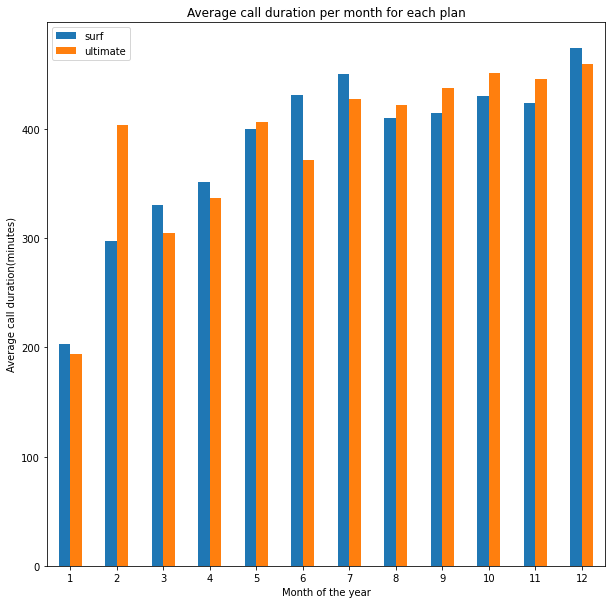

In [40]:
# Plotting the table to a bar graph for visualization
duration_merged.plot(
    y=['surf', 'ultimate'],
    kind='bar',
    figsize=[10, 10],
    xlabel='Month of the year',
    ylabel='Average call duration(minutes)',
    title='Average call duration per month for each plan',
    rot=0
    
)

plt.show()

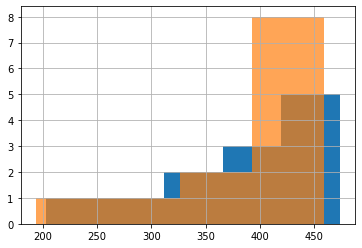

In [41]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
duration_merged['surf'].hist(bins=5)
duration_merged['ultimate'].hist(alpha=0.7, bins=4)

plt.show()

In [42]:
# Calculate the mean and the variance of the monthly call duration
surf_duration_mean = duration_merged['surf'].mean()
surf_duration_var = duration_merged['surf'].var()

print('Surf plan duration mean:', round(surf_duration_mean))
print('Surf plan duration variance:', round(surf_duration_var))

ultimate_duration_mean = duration_merged['ultimate'].mean()
ultimate_duration_var = duration_merged['ultimate'].var()

print('Ultimate plan duration mean:', round(ultimate_duration_mean))
print('Ultimate plan duration variance:', round(ultimate_duration_var))


Surf plan duration mean: 384
Surf plan duration variance: 5858
Ultimate plan duration mean: 388
Ultimate plan duration variance: 5970


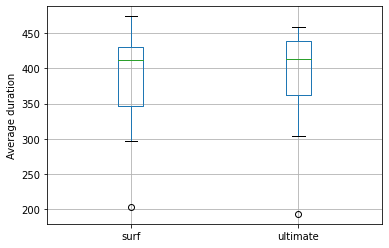

In [43]:
# Plot a boxplot to visualize the distribution of the monthly call duration
duration_merged[['surf', 'ultimate']].boxplot()
plt.ylabel('Average duration')
plt.show()

In [44]:
duration_merged[['surf', 'ultimate']].describe().round(2)

,surf,ultimate
count,12.00,12.00
mean,384.47,388.00
std,76.54,77.27
min,203.00,193.50
25%,346.16,362.44
50%,412.17,413.84
75%,430.12,439.43
max,473.84,459.10


Through the box plot we can see that both plans have outliers around the 200-minute duration. Both plans have a negative skew, while having almost the same value as the median. The distribution of both plans are very similar, with almost the same values in the average and the variance values of both plans' call behaviour.

We can see that during the first 6 months of the year, the surf plan has higher averages than its ultimate counterpart for the same month, with only February and May where ultimate has a higher average. This pattern reverses on the last 6 months, where in 4 of the months, ultimate has a higher average duration than surf. December has the most number of minutes for both plans. This is likely due to the end of the year being the time when people are on break from their work, and therefore have extra time to spare doing phone calls. October comes in 2nd place, and followed by July for the highest average call duration in 2018.

### Messages

In [45]:
# Compare the number of messages users of each plan tend to send each month

# Seperating message count for each plan
messages_surf = surf_agg[['messages_count', 'month']]
messages_ultimate = ultimate_agg[['messages_count', 'month']]

# Grouping by the month for monthly usage and averaging the uses
messages_surf = messages_surf.groupby('month').mean()
messages_ultimate = messages_ultimate.groupby('month').mean()

# Merging both dataframes
messages_merged = messages_surf.merge(messages_ultimate,  left_index=True, right_index=True)
                                                              
# Renaming the columns
messages_merged = messages_merged.rename(
    columns={'messages_count_x':'surf', 'messages_count_y':'ultimate'}
)
# Changing the messages count to integer as it doesn't make sense to send half a message
messages_merged = messages_merged.round().astype('int')
messages_merged


,surf,ultimate
month,,
1,10,16
2,12,22
3,15,20
4,17,22
5,24,32
6,25,29
7,27,33
8,29,38
9,31,38


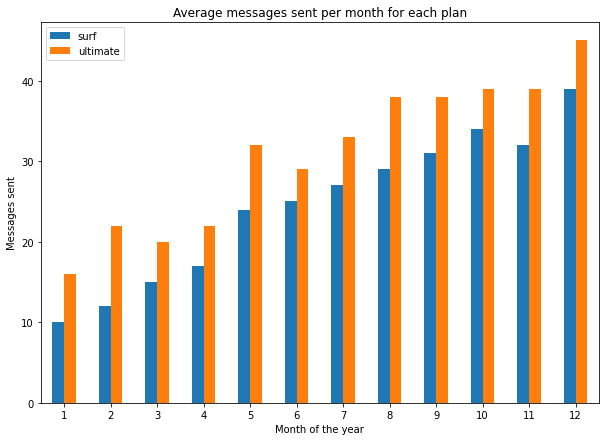

In [46]:
messages_merged.plot(
    title='Average messages sent per month for each plan',
    y=['surf', 'ultimate'],
    xlabel='Month of the year',
    ylabel='Messages sent',
    kind='bar',
    figsize=[10, 7],
    rot=0
)

plt.show()

Unlike the call minutes, ultimate consistently has a higher average than surf users, with all months having ultimate users sending more messages. This graph also shows how the average number of messages sent increases for both plans as it reaches the end of the year, having December as the highest average of messages sent overall.

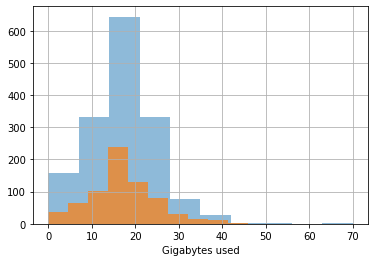

In [47]:
# Compare the amount of internet traffic consumed by users per plan
surf_agg['gb_used'].hist(alpha=0.5)
ultimate_agg['gb_used'].hist(alpha=0.7)

plt.xlabel('Gigabytes used')

plt.show()

In [48]:
surf_agg['gb_used'].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

In [49]:
ultimate_agg['gb_used'].describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64

In [50]:
surf_internet_iqr = surf_agg['gb_used'].quantile(0.75) - surf_agg['gb_used'].quantile(0.25)
ultimate_internet_iqr = ultimate_agg['gb_used'].quantile(0.75) - ultimate_agg['gb_used'].quantile(0.25)

print("Surf internet usage IQR:", surf_internet_iqr)
print("Surf internet usage variance:", round(surf_agg['gb_used'].var()))
print("Ultimate internet usage IQR:", ultimate_internet_iqr)
print("Ultimate internet usage variance:", round(ultimate_agg['gb_used'].var()))

Surf internet usage IQR: 9.0
Surf internet usage variance: 62
Ultimate internet usage IQR: 8.0
Ultimate internet usage variance: 59


Based on the data, it can be seen that the usage of internet from both plans are similar, with their IQR at around the same range, as well as the median, mean, standard deviation, and variance. The only huge difference that shows is the maximum usage of a user in a month, which a certain surf user has almost double the value usage compared to that of the user who used the most in a month from ultimate.

### Internet

In [51]:
# Grabbing the internet usage per month for each plan
internet_surf = surf_agg[['gb_used', 'month']]
internet_surf = internet_surf.groupby('month').mean()
internet_ultimate = ultimate_agg[['gb_used', 'month']]
internet_ultimate = internet_ultimate.groupby('month').mean()

# Merging the two tables together
internet_merged = internet_surf.merge(internet_ultimate, left_index=True, right_index=True)
internet_merged = internet_merged.rename(
    columns={'gb_used_x':'surf', 'gb_used_y':'ultimate'}
)
internet_merged = internet_merged.round(2)

internet_merged


,surf,ultimate
month,,
1,5.00,7.25
2,12.22,17.29
3,13.57,18.42
4,12.22,16.33
5,14.12,16.86
6,15.48,15.43
7,16.88,16.49
8,16.88,17.85
9,16.69,17.01


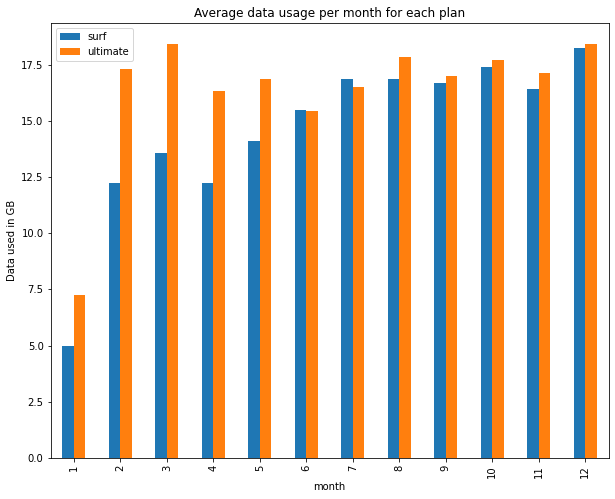

In [52]:
internet_merged.plot(
    kind='bar',
    title='Average data usage per month for each plan',
    ylabel='Data used in GB',
    figsize=[10,8]
)

plt.show()

In [53]:
internet_merged.describe()

,surf,ultimate
count,12.000000,12.00000
mean,14.595000,16.34750
std,3.628344,2.99185
min,5.000000,7.25000
25%,13.232500,16.45000
50%,15.955000,17.06500
75%,16.880000,17.75250
max,18.240000,18.42000


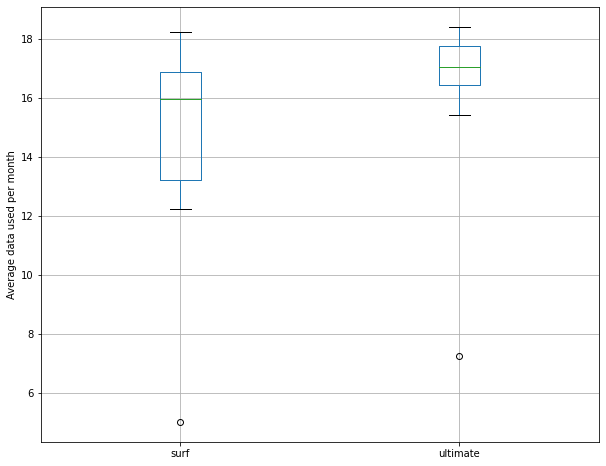

In [54]:
internet_merged.boxplot(figsize=[10, 8])
plt.ylabel('Average data used per month')
plt.show()

In [55]:
print("Surf average usage IQR:", round(internet_merged['surf'].quantile(.75) - internet_merged['surf'].quantile(.25)))
print("Surf average usage variance:", round(internet_merged['surf'].var()))
print("Ultimate average usage IQR:", round(internet_merged['ultimate'].quantile(.75) - internet_merged['ultimate'].quantile(.25)))
print("Ultimate average usage variance:", round(internet_merged['ultimate'].var()))

Surf average usage IQR: 4
Surf average usage variance: 13
Ultimate average usage IQR: 1
Ultimate average usage variance: 9


Based on the plots we can see that ultimate users tend to use a higher amount of data compared to surf users, with ultimate users having a higher concentration of users using 16-17 gigabytes of data, in comparison to surf users, which has a more spread out amount of data used with a range between 13-17 gigabytes of usage monthly. Surf internet usage also has a negative skew, whereas ultimate users have a slight positive skew.

## Revenue

In [56]:
# Grouping the revenue data of both plans and merging them
surf_revenue = surf_agg.groupby('month').sum().reset_index()[['month','revenue']]
ultimate_revenue = ultimate_agg.groupby('month').sum().reset_index()[['month', 'revenue']]
revenue_merged = surf_revenue.merge(
    ultimate_revenue,
    on='month'
)
revenue_merged = revenue_merged.rename(columns={'revenue_x': 'surf', 'revenue_y': 'ultimate'})
revenue_merged

,month,surf,ultimate
0,1,40.00,280.0
1,2,309.57,490.0
2,3,1056.65,896.0
3,4,2035.53,1533.0
4,5,3667.37,2051.0
5,6,4779.80,3367.0
6,7,7583.56,4242.0
7,8,10356.85,5173.0
8,9,11304.67,6195.0
9,10,15504.83,7665.0


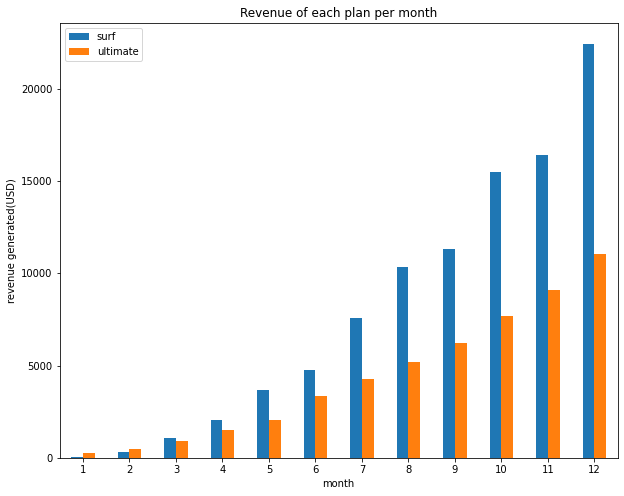

In [57]:
revenue_merged.plot(
    kind='bar',
    title='Revenue of each plan per month',
    y=['surf', 'ultimate'],
    xlabel='month',
    ylabel='revenue generated(USD)',
    x='month',
    figsize=[10,8],
    rot=0
)

plt.show()

In [58]:
revenue_merged[['surf', 'ultimate']].describe()

,surf,ultimate
count,12.000000,12.000000
mean,7957.598333,4338.833333
std,7308.944540,3572.746329
min,40.000000,280.000000
25%,1790.810000,1373.750000
50%,6181.680000,3804.500000
75%,12354.710000,6562.500000
max,22437.140000,11067.000000


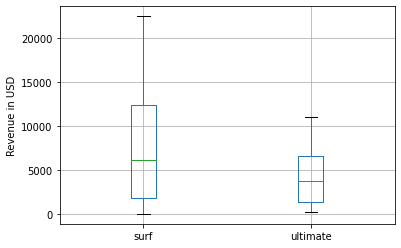

In [59]:
revenue_merged[['surf', 'ultimate']].boxplot()
plt.ylabel('Revenue in USD')
plt.show()

In [60]:
surf_rev_iqr = revenue_merged['surf'].quantile(.75) - revenue_merged['surf'].quantile(.25)
ultimate_rev_iqr = revenue_merged['ultimate'].quantile(.75) - revenue_merged['ultimate'].quantile(.25)
print("Surf plan's IQR:",surf_rev_iqr.round(2))
print("Ultimate plan's IQR:",ultimate_rev_iqr.round(2))

Surf plan's IQR: 10563.9
Ultimate plan's IQR: 5188.75


[Formulate conclusions about how the revenue differs between the plans.]

In [61]:
surf_agg.count()

month               1573
calls_count         1573
duration_rounded    1573
gb_used             1573
messages_count      1573
plan                1573
revenue             1573
dtype: int64

In [62]:
ultimate_agg.count()

month               720
calls_count         720
duration_rounded    720
gb_used             720
messages_count      720
plan                720
revenue             720
dtype: int64

From the data we can see that within the first 2 months of the year, ultimate has a higher revenue per month. But that changes once it reaches the third month, with surf starting to bring in more revenue per month, and it continues to grow until the end of the year, where in December, surf had generated more than double the revenue compared to ultimate. Some factors to consider include the fact that there are more surf users than ultimate, and that surf charges more per exceeded monthly usage than ultimate.

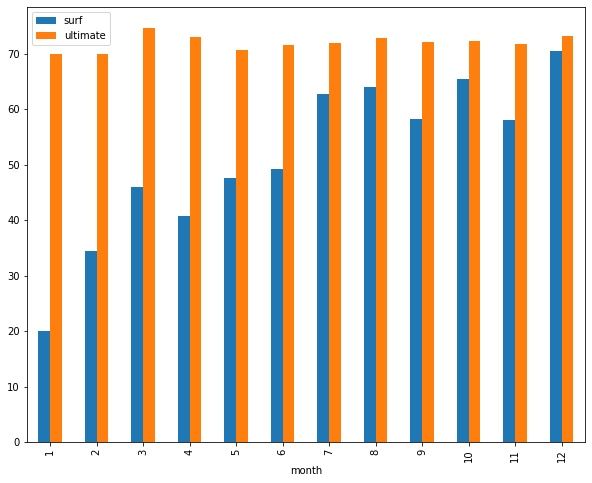

In [63]:
# Grabbing the average revenue from both plans
surf_avg_revenue = surf_agg.groupby('month').mean().reset_index()[['month', 'revenue']]
ultimate_avg_revenue = ultimate_agg.groupby('month').mean().reset_index()[['month', 'revenue']]

# Merging them together for a side by side comparison

avg_revenue = surf_avg_revenue.merge(
    ultimate_avg_revenue,
    on='month'
)
avg_revenue = avg_revenue.rename(columns={'revenue_x':'surf', 'revenue_y':'ultimate'})
avg_revenue.plot(
    kind='bar',
    x='month',
    y=['surf', 'ultimate'],
    figsize=[10, 8]
)

plt.show()

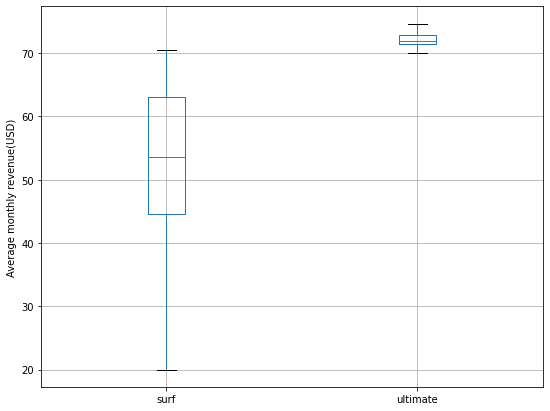

In [64]:
avg_revenue[['surf', 'ultimate']].boxplot(figsize=[9, 7])
plt.ylabel('Average monthly revenue(USD)')
plt.show()

In [65]:
avg_revenue[['surf', 'ultimate']].describe().round(2)

,surf,ultimate
count,12.00,12.00
mean,51.40,72.01
std,14.70,1.36
min,20.00,70.00
25%,44.63,71.41
50%,53.64,71.97
75%,62.99,72.89
max,70.56,74.67


From this data however, ultimate brings in a much higher amount revenue on average compared to surf users across the whole year, albeit having a smaller concentration of users. This makes sense due to the starting monthly pay of the ultimate plan alone being +$50 more than surf, which leads to ultimate users generating more revenue at the base.

## Test statistical hypotheses

I am going to test the statistical hypotheses that the average revenue from users of Surf and Ultimate differs.

H₀ = The average revenue from Surf and Ultimate users are the same. 

H1 = The average revenue from Surf and Ultimate differs.

In [66]:
# Testing the hypotheses

# Setting alpha value significance to 5%

alpha = 0.05

# Applying the test for comparing both data
results = st.ttest_ind(surf_agg['revenue'],
                      ultimate_agg['revenue'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We can't reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

p-value: 3.17039054811355e-15
We can't reject the null hypothesis.


The analysis suggests that the average revenue is actually not different from both plans. We need more data to say how similar are they to each other.

I am going to do another test based on a sample location of the users, namely users from NY-NJ area to other areas.

H₀ = Average revenue from NY-NJ are the same.

H1 = Average revenue from NY-NJ differs to other areas.

In [67]:
# Filtering out data of users from NJ-NY and outside NJ-NY
city = 'NY-NJ'

users_njny = users[users['city'].str.contains(city)]
users_outside = users[~users['city'].str.contains(city)]

agg_table = agg_table.reset_index()

In [68]:
# Grabbing the revenue data for both areas
users_njny_revenue = agg_table[agg_table['user_id'].isin(users_njny['user_id'])][['month', 'revenue']]


users_outside_revenue = agg_table[agg_table['user_id'].isin(users_outside['user_id'])][['month', 'revenue']]



In [69]:
# Test the hypotheses

# Applying the test for both dataframe
results_area = st.ttest_ind(users_njny_revenue['revenue'], 
                            users_outside_revenue['revenue'], equal_var=False)

print("p-value:", results_area.pvalue)

if results_area.pvalue < alpha:
    print("We can't reject the null hypothesis")
else:
    print("We reject the null hyphothesis")




p-value: 0.03352561588530014
We can't reject the null hypothesis


This test shows that the average monthly revenue from both areas are not actually that much different. This shows that when factoring the area in which each user comes from doesn't really affect the average revenue.

## General conclusion


From all the data that I have gathered, I've come up with a few things.

First of all, the behaviour of users from both plans are very similar to each other in value, especially in calls, where users from both plan have almost the same duration used per month. This, coupled with the fact that users have to spend more when going above the plan's threshold of monthly usage, means that surf users will generate more revenue as they have a lower monthly usage limit, and a higher cost-per-extra activity above the limit compared to ultimate.

Secondly, the data shows that surf generated a much higher revenue overall, whereas ultimate generated a higher revenue on average. This is due to some factors, one of them is the difference in the amount of users from each plan, with there being double the amount of surf users compared to ultimate users. Another reason is that ultimate's base charge is 70, compared to surf's $20. This leads to a higher 'lowest' value of ultimate's revenue.

Lastly, the hypothesis does suggest that there isn't any difference in the spending behaviour between users from both plans. We have also checked that the location of the users does not play a role in the average revenue.

In conclusion, it shows that in overall, the surf plan generates the higher revenue due to it being having a lower threshold of monthly usage and higher cost per extra activity. The low initial cost also attracts a higher amount of customers. Whereas due to the ultimate plan having a higher initial cost, it attracts less customers, and more often than not does not generate that much extra revenue from the above-the-limit usage, as it has a higher threshold and lower cost. 